In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import config
%matplotlib inline
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [3]:
postgres_user = config.user
postgres_pw = config.password
postgres_host = config.host
postgres_port = config.port
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

ed_df = pd.read_sql_query('select * from useducation',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
* Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
* In your chosen state, in which of the lessons are the students more successful—math or reading?
* What are the distributions of the math and reading scores in the sample?
* Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [4]:
ed_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


In [5]:
ed_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


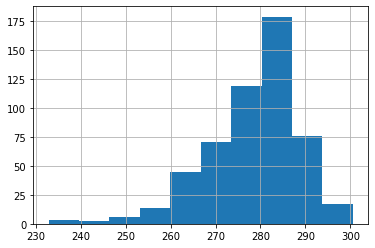

In [121]:
drop_na_df = ed_df['AVG_MATH_8_SCORE'].dropna()
drop_na_df.hist()

In [47]:
df_cal = ed_df[ed_df['STATE'] == 'CALIFORNIA']
# years = (df_cal['YEAR'] >= 1992) & (df_cal['YEAR'] < 1998)
df_cal = df_cal.iloc[ : , [2, 4, 8]]
df_cal.head()


,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,208.398961,260.892247,196.764414,NaN
56,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN
213,209.129083,262.772478,201.912591,269.197451


2. Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.


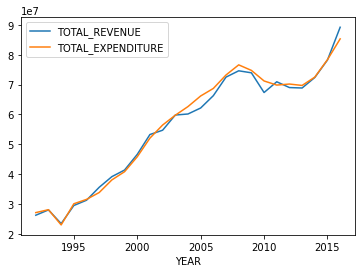

In [42]:
df_cal.plot(x='YEAR', y=['TOTAL_REVENUE','TOTAL_EXPENDITURE'])

According to the top result of my Google search, "The most severe financial crisis since the Great Depression that lasted from 2007 to 2009 had a profound impact on K-12 education. Roughly two-thirds of states cut spending on schools to deal with the loss in tax revenue, leading to cuts in the teacher workforce and shrinking state education departments." There was also a bit of a recession in the early 90s and this graph can show the effects of the recessions on the education system from 1992-'95 and from about 2008-'10.


3. In your chosen state, in which of the lessons are the students more successful—math or reading?

In [101]:
df_cal = ed_df[ed_df['STATE'] == 'CALIFORNIA']
df_cal = df_cal.iloc[ : , [21, 22, 23, 24]]
df_cal.head()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,208.398961,260.892247,196.764414,NaN
56,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN
213,209.129083,262.772478,201.912591,269.197451


In [50]:
df_cal.isnull().sum().sort_values(ascending = False)/len(df_cal)

AVG_READING_8_SCORE    0.615385
AVG_READING_4_SCORE    0.576923
AVG_MATH_8_SCORE       0.576923
AVG_MATH_4_SCORE       0.576923
dtype: float64

In [52]:
df_cal = df_cal.dropna()

In [54]:
df_cal.describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,10.000000,10.000000,10.000000,10.000000
mean,227.385691,270.201543,209.026260,261.902652
std,8.724144,5.155037,4.095743,4.861743
min,209.129083,262.171027,201.912591,254.895247
25%,228.099759,267.426658,206.065447,259.188273
50%,230.958151,270.415186,209.142296,261.902941
75%,232.115938,274.685881,212.249135,264.416677
max,234.164993,276.638200,215.421814,269.197451


It appears as though Math is the better subject. 

4. What are the distributions of the math and reading scores in the sample?

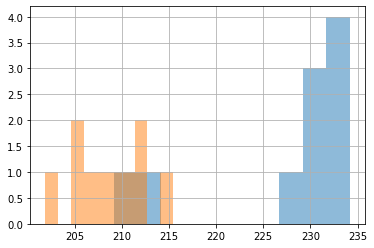

In [60]:
df_cal['AVG_MATH_4_SCORE'].hist(alpha = 0.5)
df_cal['AVG_READING_4_SCORE'].hist(alpha = 0.5)
plt.show()

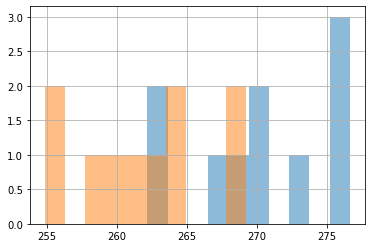

In [61]:
df_cal['AVG_MATH_8_SCORE'].hist(alpha = 0.5)
df_cal['AVG_READING_8_SCORE'].hist(alpha = 0.5)
plt.show()

5. Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [105]:
df_cal = ed_df[ed_df['STATE'] == 'CALIFORNIA']
df_cal = df_cal.iloc[ : , [21, 22, 23, 24]]
df_cal.head()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,208.398961,260.892247,196.764414,NaN
56,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN
213,209.129083,262.772478,201.912591,269.197451


In [115]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 4 to 1451
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AVG_MATH_4_SCORE     11 non-null     float64
 1   AVG_MATH_8_SCORE     11 non-null     float64
 2   AVG_READING_4_SCORE  11 non-null     float64
 3   AVG_READING_8_SCORE  10 non-null     float64
dtypes: float64(4)
memory usage: 1.0 KB


In [106]:
fill_list = ['AVG_MATH_4_SCORE','AVG_READING_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_8_SCORE']

In [107]:
df_cal_mean = df_cal.copy()
for col in fill_list:
    df_cal_mean.loc[:, col] = df_cal_mean.loc[:, col].fillna(df_cal_mean.loc[:, col].mean())

df_cal_med = df_cal.copy()
for col in fill_list:
    df_cal_med.loc[:, col] = df_cal_med.loc[:, col].fillna(df_cal_med.loc[:, col].median())
    
df_cal_inter = df_cal.copy()
for col in fill_list:
    df_cal_inter.loc[:, col] = df_cal_inter.loc[:, col].fillna(df_cal_inter.loc[:, col].interpolate())

In [116]:
df_cal_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 4 to 1451
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AVG_MATH_4_SCORE     26 non-null     float64
 1   AVG_MATH_8_SCORE     26 non-null     float64
 2   AVG_READING_4_SCORE  26 non-null     float64
 3   AVG_READING_8_SCORE  26 non-null     float64
dtypes: float64(4)
memory usage: 1.0 KB


In [117]:
df_cal_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 4 to 1451
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AVG_MATH_4_SCORE     26 non-null     float64
 1   AVG_MATH_8_SCORE     26 non-null     float64
 2   AVG_READING_4_SCORE  26 non-null     float64
 3   AVG_READING_8_SCORE  26 non-null     float64
dtypes: float64(4)
memory usage: 1.0 KB


In [118]:
df_cal_inter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 4 to 1451
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AVG_MATH_4_SCORE     26 non-null     float64
 1   AVG_MATH_8_SCORE     26 non-null     float64
 2   AVG_READING_4_SCORE  26 non-null     float64
 3   AVG_READING_8_SCORE  22 non-null     float64
dtypes: float64(4)
memory usage: 1.0 KB


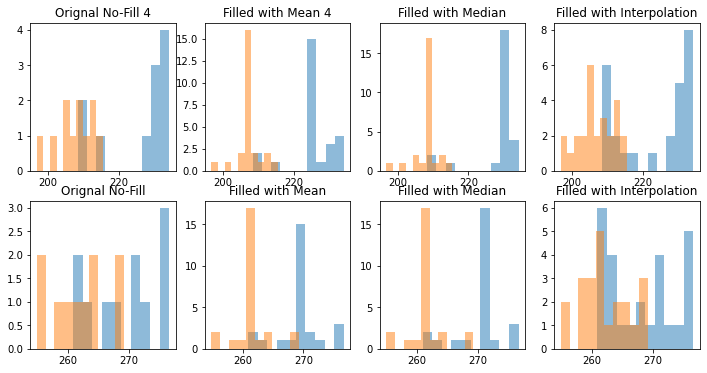

In [108]:
plt.figure(figsize=(12,6))
plt.subplot(2,4,1)
plt.title('Orignal No-Fill 4')
plt.hist(df_cal['AVG_MATH_4_SCORE'], alpha = 0.5)
plt.hist(df_cal['AVG_READING_4_SCORE'], alpha = 0.5)

plt.subplot(2,4,2)
plt.title('Filled with Mean 4')
plt.hist(df_cal_mean['AVG_MATH_4_SCORE'], alpha = 0.5)
plt.hist(df_cal_mean['AVG_READING_4_SCORE'], alpha = 0.5)

plt.subplot(2,4,5)
plt.title('Orignal No-Fill')
plt.hist(df_cal['AVG_MATH_8_SCORE'], alpha = 0.5)
plt.hist(df_cal['AVG_READING_8_SCORE'], alpha = 0.5)

plt.subplot(2, 4, 6)
plt.title('Filled with Mean')
plt.hist(df_cal_mean['AVG_MATH_8_SCORE'], alpha = 0.5)
plt.hist(df_cal_mean['AVG_READING_8_SCORE'], alpha = 0.5)

plt.subplot(2,4,3)
plt.title('Filled with Median')
plt.hist(df_cal_med['AVG_MATH_4_SCORE'], alpha = 0.5)
plt.hist(df_cal_med['AVG_READING_4_SCORE'], alpha = 0.5)


plt.subplot(2,4,7)
plt.title('Filled with Median')
plt.hist(df_cal_med['AVG_MATH_8_SCORE'], alpha = 0.5)
plt.hist(df_cal_med['AVG_READING_8_SCORE'], alpha = 0.5)


plt.subplot(2,4,4)
plt.title('Filled with Interpolation')
plt.hist(df_cal_inter['AVG_MATH_4_SCORE'], alpha = 0.5)
plt.hist(df_cal_inter['AVG_READING_4_SCORE'], alpha = 0.5)

plt.subplot(2,4,8)
plt.title('Filled with Interpolation')
plt.hist(df_cal_inter['AVG_MATH_8_SCORE'], alpha = 0.5)
plt.hist(df_cal_inter['AVG_READING_8_SCORE'], alpha = 0.5)
plt.show()

In [110]:
math_mean_orig4 = df_cal['AVG_MATH_4_SCORE'].mean()
math_mean_med4 = df_cal_med['AVG_MATH_4_SCORE'].mean()
math_mean_inter4 = df_cal_inter['AVG_MATH_4_SCORE'].mean()
math_mean_mean4 = df_cal_mean['AVG_MATH_4_SCORE'].mean()
math_mean_mean8 = df_cal_mean['AVG_MATH_8_SCORE'].mean()
math_mean_med8 = df_cal_med['AVG_MATH_8_SCORE'].mean()
math_mean_inter8 = df_cal_inter['AVG_MATH_8_SCORE'].mean()
math_mean_orig8 = df_cal['AVG_MATH_8_SCORE'].mean()

read_mean_orig4 = df_cal['AVG_READING_4_SCORE'].mean()
read_mean_med4 = df_cal_med['AVG_READING_4_SCORE'].mean()
read_mean_inter4 = df_cal_inter['AVG_READING_4_SCORE'].mean()
read_mean_mean4 = df_cal_mean['AVG_READING_4_SCORE'].mean()
read_mean_mean8 = df_cal_mean['AVG_READING_8_SCORE'].mean()
read_mean_med8 = df_cal_med['AVG_READING_8_SCORE'].mean()
read_mean_inter8 = df_cal_inter['AVG_READING_8_SCORE'].mean()
read_mean_orig8 = df_cal['AVG_READING_8_SCORE'].mean()

In [111]:
print(math_mean_orig4,read_mean_orig4)

225.65962456591936 207.91154673862795


In [112]:
print(math_mean_med4,read_mean_med4)

228.37539356577355 208.2638385980061


In [113]:
print(math_mean_mean4,read_mean_mean4)

225.65962456591933 207.91154673862795


In [114]:
print(math_mean_inter4,read_mean_inter4)

223.26588824035696 206.93236960320039


Filling NaNs with the mean didn't do very much. Filling with the median looks to have brought the average of all the values higher, and this lines up with what can be observed by comparing the histograms. Interpolation seems to bring the average of all the values a little lower than the average of the original, non-filled, values.